In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime

In [ ]:
symbol='AAPL' #make sure it follows Yahoo Finance Ticker format
start_date='2010-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

def Logarithmic_regression(df):

    df['price_y']=np.log(df['Close']) # using natural log of stock price

    df['x']=np.arange(len(df)) #fill index x column with 1,2,3...n
    b,a =np.polyfit(df['x'],df['price_y'],1)

    df['priceTL']=b*df['x'] + a

    df['y-TL']=df['price_y']-df['priceTL']
    df['SD']=np.std(df['y-TL'])
    df['TL-2SD']=df['priceTL']-2*df['SD']
    df['TL-SD']=df['priceTL']-df['SD']
    df['TL+2SD']=df['priceTL']+2*df['SD']
    df['TL+SD']=df['priceTL']+df['SD']

    return df

def plot_chart(df):

    RAINBOWCOLOR1='hotpink'
    RAINBOWCOLOR2='orange'
    RAINBOWCOLOR3='gold'
    RAINBOWCOLOR4='yellowgreen'
    RAINBOWCOLOR5='lightgreen'

    fig, (ax1, ax2) = plt.subplots(dpi=600,nrows=2, sharex=True)

    # chart beautification
    ax1.grid(True, color='silver',linewidth=0.5)
    ax2.grid(True, color='silver',linewidth=0.5)
    ax1.set_ylabel('Price')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Indicator')
    plt.title(f'{symbol} Stock Price Trend with Logarithmic Regression',fontsize=10)
    ax2.set_xticklabels(df['Date'],rotation=90,fontsize=6)
    date_form = DateFormatter("%m/%y")
    ax2.xaxis.set_major_formatter(date_form)

    # plotting normal stock price on top chart
    ax1.plot(df['Date'],df['Close'], color='blue',linewidth=0.5)

    # plotting stock price on log regression at bottom chart
    ax2.plot(df['Date'],df['price_y'],color='black',linewidth=0.5)

    # plotting stock price on log regression
    ax2.plot(df['Date'],df['TL+2SD'],color=RAINBOWCOLOR1, linewidth=0.5)
    ax2.plot(df['Date'],df['TL+SD'],color=RAINBOWCOLOR2,  linewidth=0.5)
    ax2.plot(df['Date'],df['priceTL'],color=RAINBOWCOLOR3,linewidth=0.5)
    ax2.plot(df['Date'],df['TL-SD'], color=RAINBOWCOLOR4, linewidth=0.5)
    ax2.plot(df['Date'],df['TL-2SD'],color=RAINBOWCOLOR5, linewidth=0.5)

    # fill the corridors
    ax2.fill_between(df['Date'],df['TL+2SD'], df['TL+SD'],facecolor=RAINBOWCOLOR2,  alpha=0.6,edgecolor=None,linewidth=0)
    ax2.fill_between(df['Date'],df['TL+SD'], df['priceTL'],facecolor=RAINBOWCOLOR3, alpha=0.6,edgecolor=None,linewidth=0)
    ax2.fill_between(df['Date'],df['priceTL'], df['TL-SD'],facecolor=RAINBOWCOLOR4, alpha=0.6,edgecolor=None,linewidth=0)
    ax2.fill_between(df['Date'],df['TL-SD'], df['TL-2SD'],facecolor=RAINBOWCOLOR5,  alpha=0.6,edgecolor=None,linewidth=0)

<ipython-input-8-0d595aab28e9>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df['Date'],rotation=90,fontsize=6)


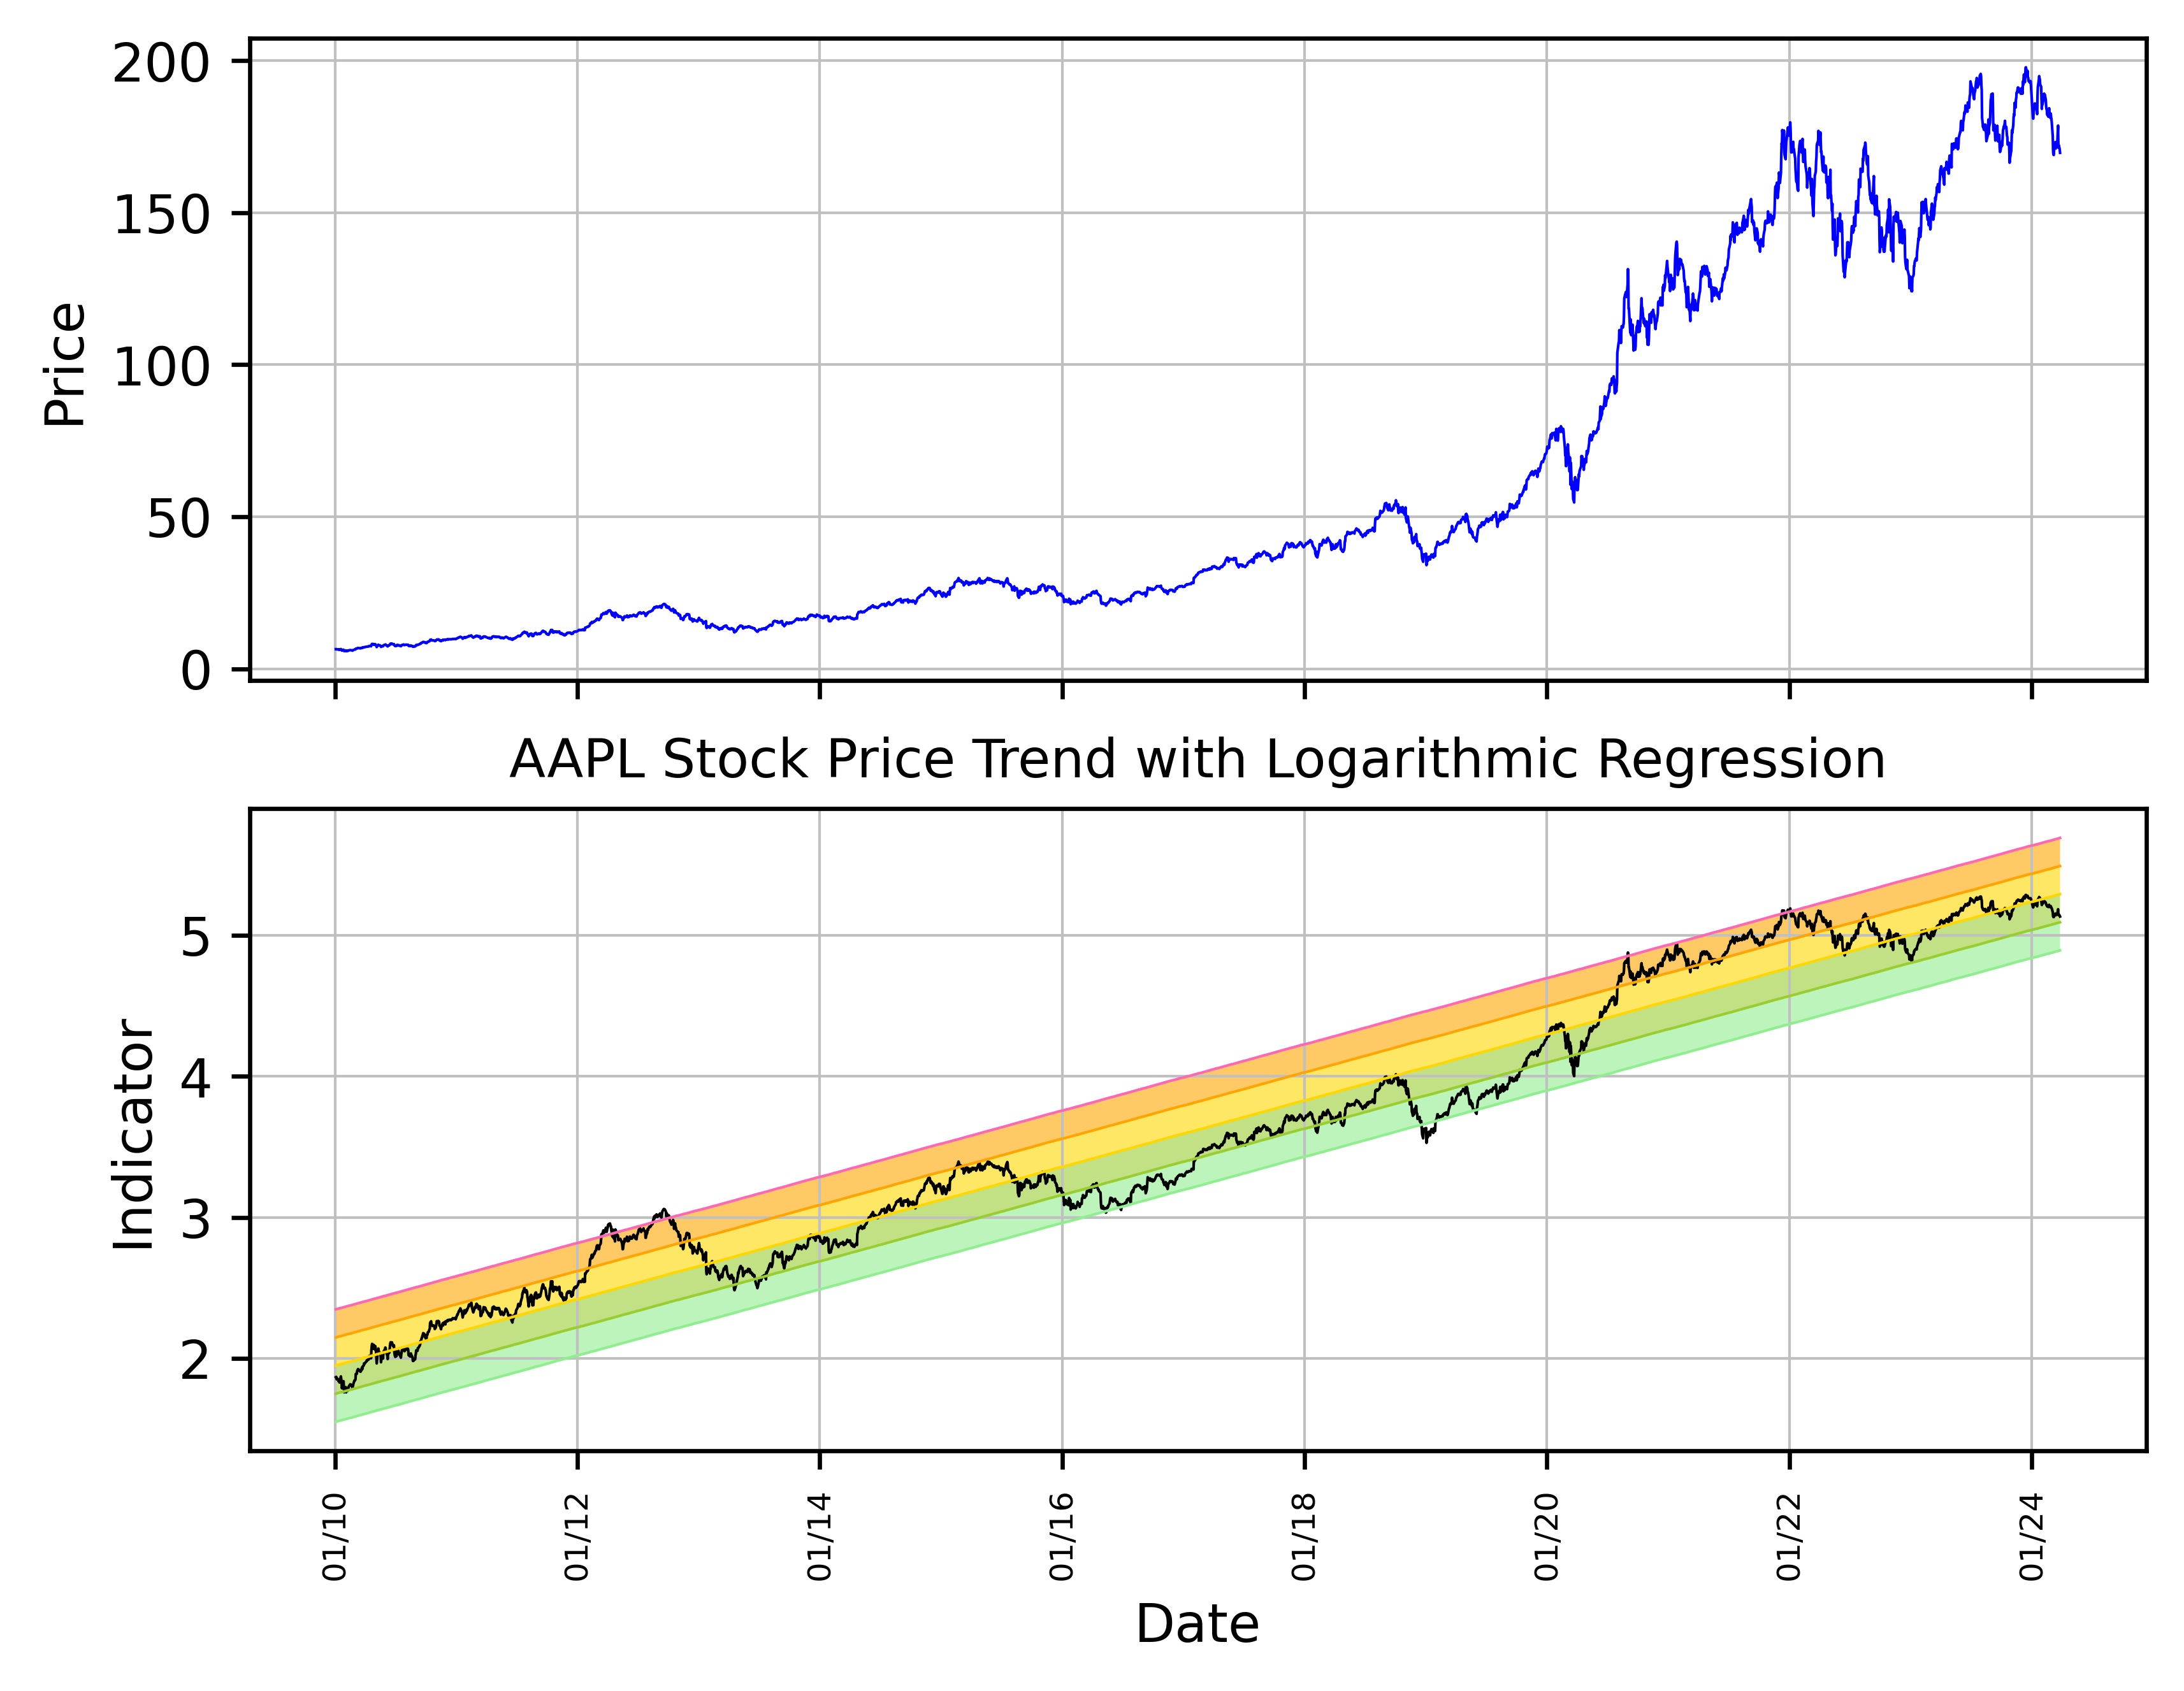

In [ ]:
if __name__ == '__main__':

    df = pd.DataFrame()
    df=yf.Ticker(symbol).history(start=start_date,end=end_date, interval='1d').reset_index()

    df=Logarithmic_regression(df)
    plot_chart(df)